In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Load Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Load Data

In [3]:
df = pd.read_csv('pulsar_data_train.csv')

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


# Data Cleaning

In [5]:
#let's check for missing/ unique values
def dfaux (df):
    cant = df.isnull().sum()
    df_aux = pd.DataFrame(index = df.columns, data =
                         {'type': df.dtypes,
                          'unique_values': df.nunique(),
                          'have_null?': df.isnull().any(),
                          'how many?' : cant,
                          'per' : cant/df.shape[0]*100 })
    return df_aux

In [6]:
dfaux(df)

,type,unique_values,have_null?,how many?,per
Mean of the integrated profile,float64,7192,False,0,0.000000
Standard deviation of the integrated profile,float64,12510,False,0,0.000000
Excess kurtosis of the integrated profile,float64,10793,True,1735,13.848978
Skewness of the integrated profile,float64,12528,False,0,0.000000
Mean of the DM-SNR curve,float64,7224,False,0,0.000000
Standard deviation of the DM-SNR curve,float64,11348,True,1178,9.402937
Excess kurtosis of the DM-SNR curve,float64,12526,False,0,0.000000
Skewness of the DM-SNR curve,float64,11901,True,625,4.988825
target_class,float64,2,False,0,0.000000


**There are quite many null values in three of the total features. Let's replace the null values with mean**

In [7]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
#replacing null values
df[" Excess kurtosis of the integrated profile"] = df[" Excess kurtosis of the integrated profile"].replace(np.NaN, df[" Excess kurtosis of the integrated profile"].mean())

In [9]:
#replacing null values
df[" Standard deviation of the DM-SNR curve"] = df[" Standard deviation of the DM-SNR curve"].replace(np.NaN, df[" Standard deviation of the DM-SNR curve"].mean())
df[" Skewness of the DM-SNR curve"] = df[" Skewness of the DM-SNR curve"].replace(np.NaN, df[" Skewness of the DM-SNR curve"].mean())

In [10]:
#lets check again
dfaux(df)

,type,unique_values,have_null?,how many?,per
Mean of the integrated profile,float64,7192,False,0,0.0
Standard deviation of the integrated profile,float64,12510,False,0,0.0
Excess kurtosis of the integrated profile,float64,10794,False,0,0.0
Skewness of the integrated profile,float64,12528,False,0,0.0
Mean of the DM-SNR curve,float64,7224,False,0,0.0
Standard deviation of the DM-SNR curve,float64,11349,False,0,0.0
Excess kurtosis of the DM-SNR curve,float64,12526,False,0,0.0
Skewness of the DM-SNR curve,float64,11902,False,0,0.0
target_class,float64,2,False,0,0.0


# EDA

In [11]:
df.shape

(12528, 9)

**12528 -> rows**

**9 -> columns(features)**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        12528 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  12528 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


**All the features are of float type, even the target class**

In [13]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,0.988230,6.208450,29.613230,18.666010,4.535783,104.686104,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.289934,0.203317,2.792642,19.617161,8.451097,87.795533,0.000000
75%,127.109375,50.979103,0.478548,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


**The mean of the target variable is 9.2%, hence we can say that only 9.2% stars are pulsar stars**

<AxesSubplot:>

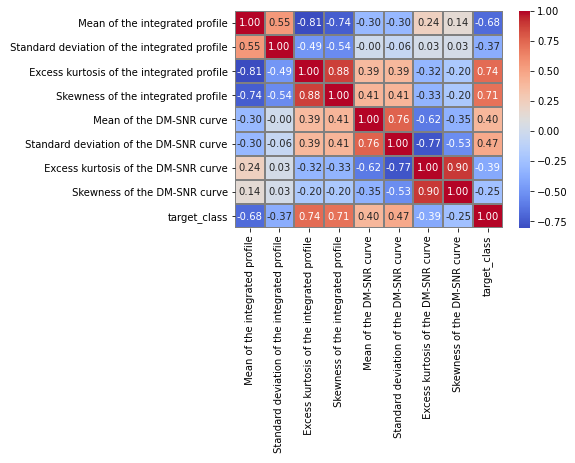

In [14]:
#correlation
corr = df.corr()
sns.heatmap(data=df.corr(),annot=True,cmap="coolwarm",linewidths=1,fmt=".2f",linecolor="gray")

**A lot of the columns shows positive correlation**

In [15]:
#Correlation with target variable
cor_target = abs(corr["target_class"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features.nlargest(n=12)

target_class                                     1.000000
 Excess kurtosis of the integrated profile       0.735358
 Skewness of the integrated profile              0.707086
 Mean of the integrated profile                  0.676129
 Standard deviation of the DM-SNR curve          0.473951
 Mean of the DM-SNR curve                        0.400375
 Excess kurtosis of the DM-SNR curve             0.389788
 Standard deviation of the integrated profile    0.365757
 Skewness of the DM-SNR curve                    0.252056
Name: target_class, dtype: float64

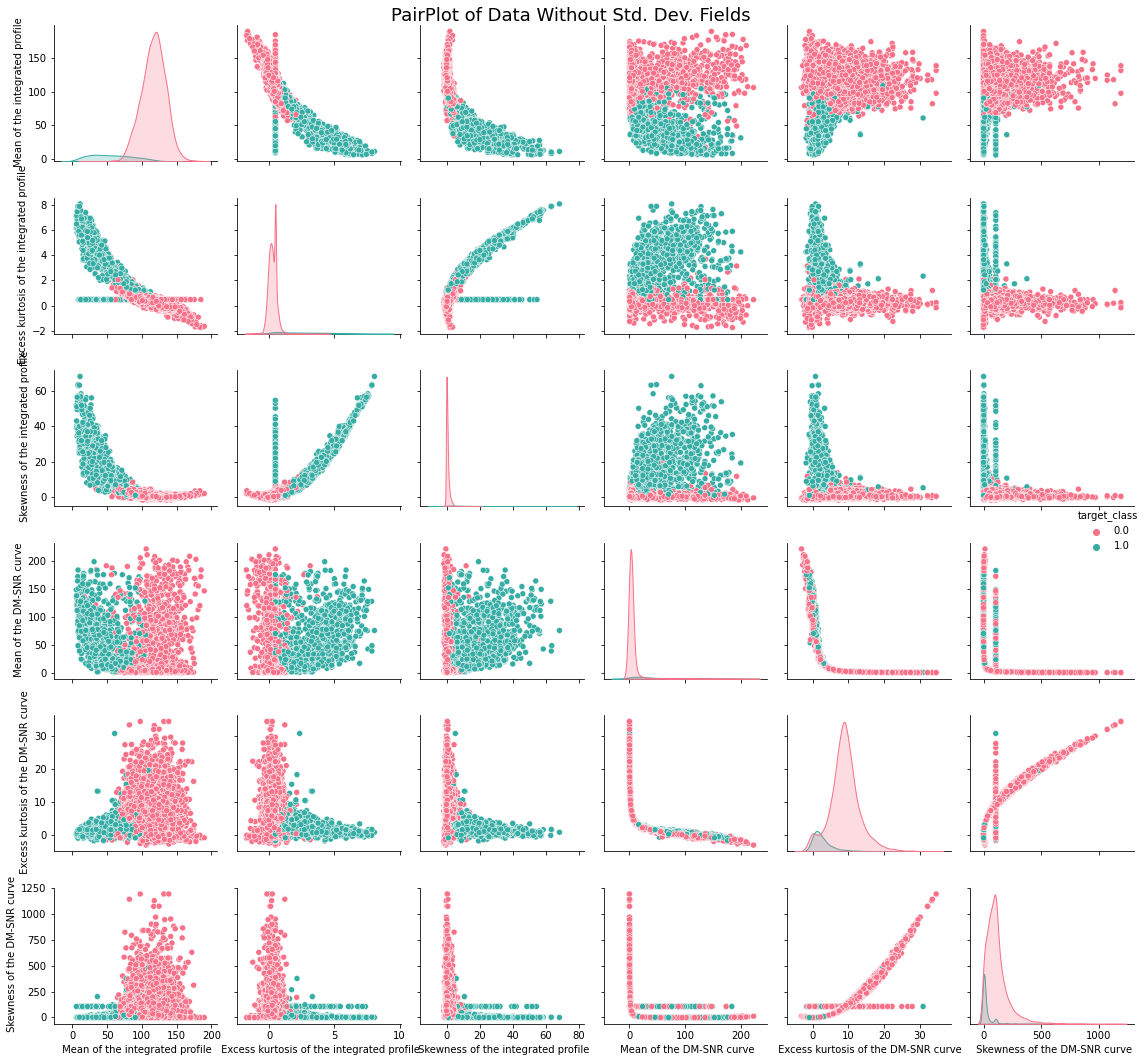

In [16]:
sns.pairplot(data=df,
             palette="husl",
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()   # pairplot without standard deviaton fields of data


**Data is quite separable on most of the columns. Since I do not have the description of these features, I won't drop any of these columns and carry on.**

In [17]:
#feature scaling
features = df.drop("target_class", axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
fscaled = scaler.fit_transform(features)

# Modeling

In [18]:
#separating input and target variable
X = df.drop("target_class", axis=1)
Y = df["target_class"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 0 )

In [20]:
#1. Random Forest
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(x_train, y_train)
y_pred2 = rforest.predict(x_test)

acc_rf = round(rforest.score(x_train, y_train)* 100, 2)
print(acc_rf)

100.0


In [22]:
#2. KNN
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
y_pred4 = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train)*100 ,2)
print(acc_knn)

97.62


In [23]:
#3. GNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)
y_pred5 = gauss.predict(x_test)
acc_gauss = round(gauss.score(x_train, y_train)*100,2)
print(acc_gauss)

94.24


In [24]:
#4. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred6 = dt.predict(x_test)
acc_dt = round(dt.score(x_train, y_train)*100,2)
print(acc_dt)

100.0


***The decision tree classifier gave an accuracy of 100%.***

# Feature Importance

In [25]:
importances = pd.DataFrame({'feature':x_train.columns, 'importance':np.round(dt.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Skewness of the integrated profile,0.683
Excess kurtosis of the integrated profile,0.135
Standard deviation of the integrated profile,0.043
Mean of the DM-SNR curve,0.037
Mean of the integrated profile,0.029
Standard deviation of the DM-SNR curve,0.029
Skewness of the DM-SNR curve,0.027
Excess kurtosis of the DM-SNR curve,0.018


<AxesSubplot:xlabel='feature'>

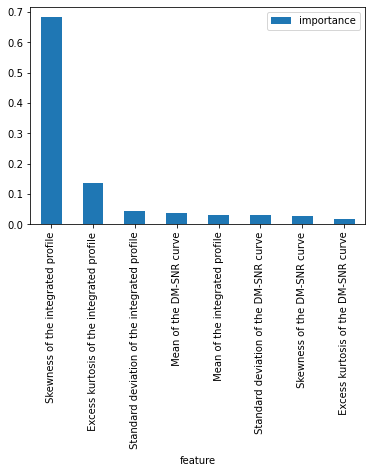

In [26]:
importances.plot.bar()

Skewness of integrated profile plays a humongous role to predict the target variable.

# Optimization

In [27]:
#confusion matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(dt, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7918552036199095
Recall: 0.8


**The model predicts 79% of the time, a star's identification as pulsar correctly.**

**It tells us that it predicted the survival of 81% of the the stars who were actually pulsar stars.**

In [28]:
#f1 score
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7959067652075041

In [30]:
#roc-auc
y_scores = dt.predict_proba(x_train)

In [31]:
y_scores= y_scores[:,1]
from sklearn.metrics import roc_auc_score
rascore  = roc_auc_score(y_train, y_scores)
print(rascore)

1.0
